In [1]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = r"C:\Users\INKumarSa91\OneDrive - NESTLE\Desktop\ON\New Microsoft Excel Worksheet.xlsx"

# Read the Excel file into a DataFrame, specifying the engine
df = pd.read_excel(excel_file_path, engine='openpyxl')

# Print the DataFrame
print(df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [2]:
X=df

In [3]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle Missing Values
print(df.isnull().sum())
df_clean = df.dropna()  # Remove rows with missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [7]:
X=df
from sklearn.model_selection import train_test_split

# Split the data into a training set and a temporary set using an 80/20 split
X_train, X_temp = train_test_split(X, test_size=0.2, random_state=42)

# Then split the temporary set into a validation set and a test set using a 50/50 split
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (9864, 18)
Validation set: (1233, 18)
Test set: (1233, 18)


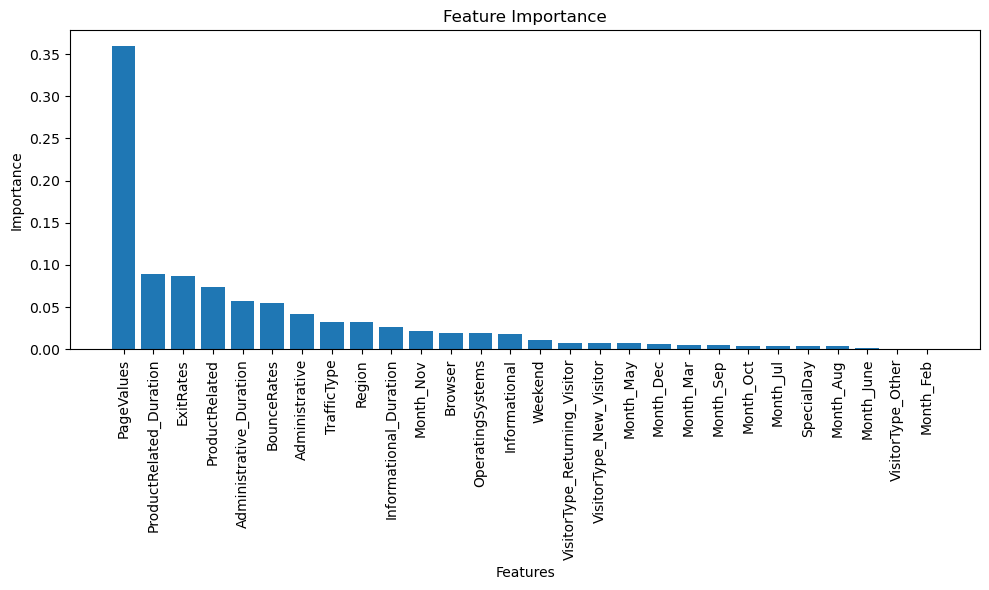

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
# Assuming 'X' contains the features and 'y' contains the target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Create a Random Forest Classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X_encoded, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Get the names of the features in descending order of importance
feature_names = X_encoded.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Random Forest feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_encoded, y)
rf_importances = rf_model.feature_importances_

# XGBoost feature importance
xgb_model = XGBClassifier()
xgb_model.fit(X_encoded, y)
xgb_importances = xgb_model.feature_importances_

# L1 Regularization (Lasso) feature importance
lasso_model = LassoCV()
lasso_model.fit(X_encoded, y)
lasso_importances = np.abs(lasso_model.coef_)

# Recursive Feature Elimination (RFE) feature importance
rfe_model = RandomForestClassifier()
rfe_selector = RFE(estimator=rfe_model, n_features_to_select=1)
rfe_selector.fit(X_encoded, y)
rfe_importances = rfe_selector.ranking_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Random Forest': rf_importances,
    'XGBoost': xgb_importances,
    'L1 Regularization': lasso_importances,
    'RFE': rfe_importances
})

# Sort the DataFrame by the average importance across all methods
feature_importances['Average Importance'] = feature_importances.mean(axis=1)
feature_importances = feature_importances.sort_values(by='Average Importance', ascending=False)

# Print the feature importances
print(feature_importances)

TypeError: can only concatenate str (not "float") to str

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# AdaBoost Classifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print("AdaBoost Accuracy:", ada_accuracy)

Linear Regression MSE: 0.10033105009202349
Logistic Regression Accuracy: 0.8682076236820763
Decision Tree Accuracy: 0.8596918085969181


C:\Users\INKumarSa91\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.8941605839416058
XGBoost Accuracy: 0.8888888888888888
AdaBoost Accuracy: 0.8832116788321168


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Decision Tree MSE:", dt_mse)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)

# XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost MSE:", xgb_mse)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_predictions = dtc_model.predict(X_test)
dtc_classification_report = classification_report(y_test, dtc_predictions)
print("Decision Tree Classification Report:\n", dtc_classification_report)

# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_predictions = rfc_model.predict(X_test)
rfc_classification_report = classification_report(y_test, rfc_predictions)
print("Random Forest Classification Report:\n", rfc_classification_report)

# XGBoost Classifier
xgbc_model = XGBClassifier()
xgbc_model.fit(X_train, y_train)
xgbc_predictions = xgbc_model.predict(X_test)
xgbc_classification_report = classification_report(y_test, xgbc_predictions)
print("XGBoost Classification Report:\n", xgbc_classification_report)

Linear Regression MSE: 0.10033105009202349
Decision Tree MSE: 0.14274128142741282
Random Forest MSE: 0.07519140308191403
XGBoost MSE: 0.082921825


C:\Users\INKumarSa91\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8682076236820763
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.92      0.92      2055
        True       0.58      0.56      0.57       411

    accuracy                           0.86      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.74      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466

XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.95      0.93      2055
        True       0.71      0.57      0.63       411

    accuracy             

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_auc_roc = roc_auc_score(y_test, rf_predictions)
print("Random Forest AUC-ROC:", rf_auc_roc)

Random Forest AUC-ROC: 0.7535279805352798


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(classifier.__class__.__name__, "Accuracy:", accuracy)

RandomForestClassifier Accuracy: 0.8978102189781022
LogisticRegression Accuracy: 0.8682076236820763
DecisionTreeClassifier Accuracy: 0.8625304136253041


C:\Users\INKumarSa91\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier Accuracy: 0.8888888888888888
AdaBoostClassifier Accuracy: 0.8832116788321168
SVC Accuracy: 0.8349553933495539
KNeighborsClassifier Accuracy: 0.8487429034874291
GaussianNB Accuracy: 0.7891321978913219
GradientBoostingClassifier Accuracy: 0.8925385239253852
ExtraTreesClassifier Accuracy: 0.8884833738848338


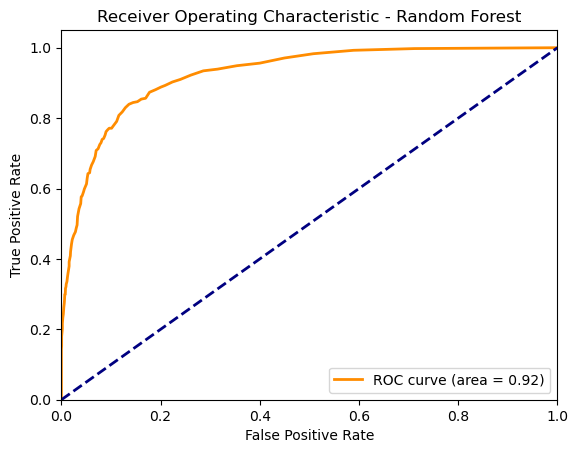

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

C:\Users\INKumarSa91\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


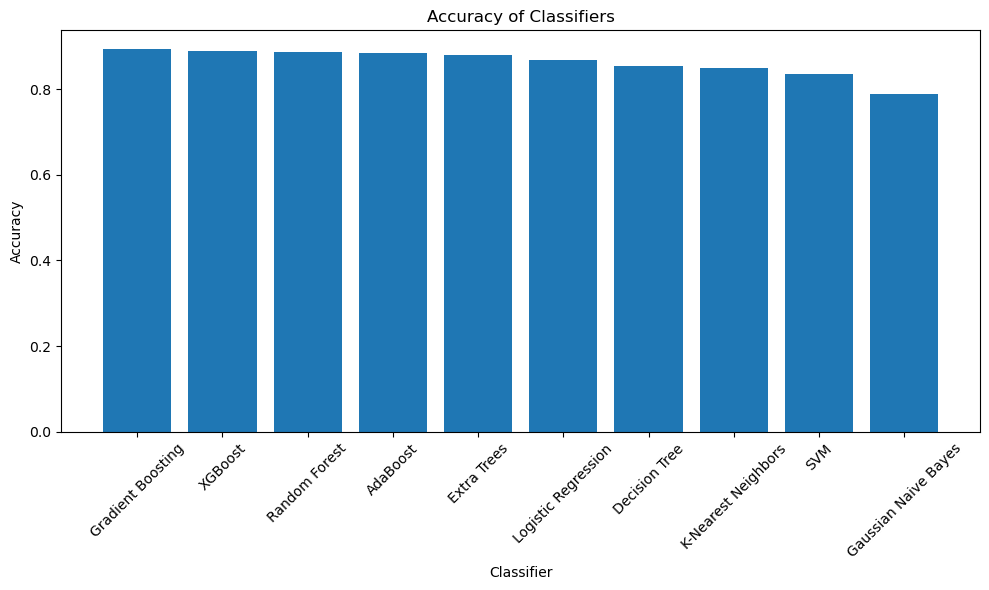

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the classifiers and their names
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier()
]

classifier_names = [
    'Random Forest',
    'Logistic Regression',
    'Decision Tree',
    'XGBoost',
    'AdaBoost',
    'SVM',
    'K-Nearest Neighbors',
    'Gaussian Naive Bayes',
    'Gradient Boosting',
    'Extra Trees'
]

# Train and evaluate each classifier
accuracies = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Sort accuracies and classifier names in descending order
accuracies, classifier_names = zip(*sorted(zip(accuracies, classifier_names), reverse=True))

# Plot the accuracies in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\INKumarSa91\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


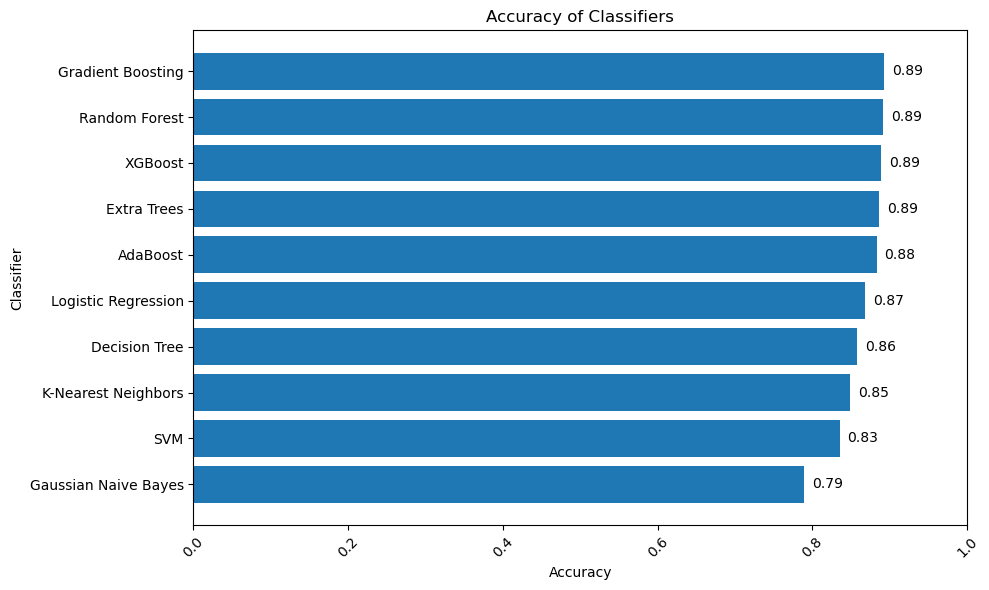

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the classifiers and their names
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier()
]

classifier_names = [
    'Random Forest',
    'Logistic Regression',
    'Decision Tree',
    'XGBoost',
    'AdaBoost',
    'SVM',
    'K-Nearest Neighbors',
    'Gaussian Naive Bayes',
    'Gradient Boosting',
    'Extra Trees'
]

# Train and evaluate each classifier
accuracies = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Sort accuracies and classifier names in descending order
accuracies, classifier_names = zip(*sorted(zip(accuracies, classifier_names), reverse=True))

# Plot the accuracies in a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(classifier_names, accuracies)
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Accuracy of Classifiers')
plt.xlim(0.0, 1.0)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

# Display the exact accuracy values on the bars
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, str(round(v, 2)), color='black', va='center')

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict_proba(X_test)[:, 1]

# Calculate the AUC (Area Under the Curve)
auc_roc = roc_auc_score(y_test, gb_predictions)
print("Gradient Boosting AUC-ROC:", auc_roc)

Gradient Boosting AUC-ROC: 0.9302792429597266


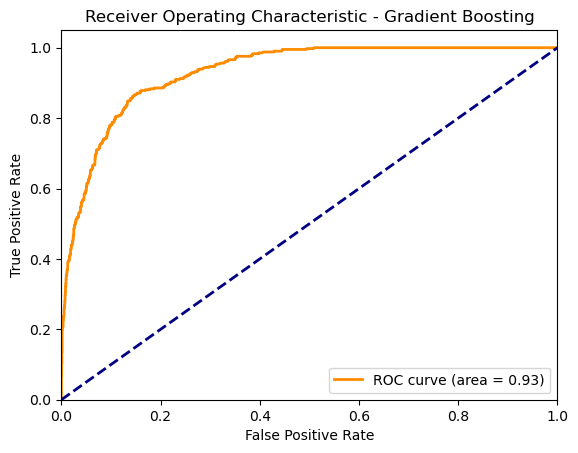

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, gb_predictions)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'X' is your DataFrame containing the dataset
# Assuming 'y' is your target variable

# Separate the features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions on new data
new_data = pd.DataFrame(X_val)  # Replace '...' with your new data
new_data_encoded = pd.get_dummies(new_data)
predictions = gb_model.predict(new_data_encoded)

# Print the predictions
print(predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Revenue


In [21]:
# Make predictions on new data
new_data = pd.DataFrame(X_val)  # Replace '...' with your new data
new_data_encoded = pd.get_dummies(new_data)

# Align column names with the training data
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Make predictions
predictions = gb_model.predict(new_data_encoded)

# Print the predictions
print(predictions)

[False False False ... False  True  True]


In [22]:
# Make predictions on the testing data
predictions = gb_model.predict(X_test)

# Create a DataFrame with the original data and predictions
result_df = pd.concat([X_test, pd.Series(predictions, name='Predictions')], axis=1)

# Print the result DataFrame
print(result_df)

       Administrative  Administrative_Duration  Informational  \
8916              3.0               142.500000            0.0   
772               6.0               437.391304            2.0   
12250             1.0                41.125000            0.0   
7793              2.0               141.000000            0.0   
6601             18.0               608.140000            6.0   
...               ...                      ...            ...   
2460              NaN                      NaN            NaN   
2461              NaN                      NaN            NaN   
2462              NaN                      NaN            NaN   
2463              NaN                      NaN            NaN   
2465              NaN                      NaN            NaN   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
8916                     0.00            48.0              1052.255952   
772                    235.55            83.0              2503.881781 